# Homework-Data Mining

Team3：大厂、燕郊、马驹桥、亦庄。

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common import NoSuchElementException
import pandas as pd
import re

driver = webdriver.Edge()

url_price = 'https://esf.fang.com/'
url_rent = 'https://zu.fang.com/'

C:\Users\LHongMing\AppData\Local\Temp\ipykernel_18180\1184200419.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## 爬取Price数据

### 定义爬取特定地点网页的函数

In [2]:
# 爬取网页的函数

# 爬取一页
def PageData_Price():
    data = []
    while True:
        fix = driver.find_elements(By.TAG_NAME,'dl')
        for dl in fix:
            row = []

            area = dl.find_elements(By.CLASS_NAME,'tel_shop')
            if area:
                row = re.findall(r'\d+.\d+|\d+', re.findall(r'\d+.\d+㎡|\d+㎡', area[0].text)[0]) # 用正则表达式提取数字

            price = dl.find_elements(By.CLASS_NAME,'price_right')
            if price:
                row += re.findall(r'\d+\.\d+|\d+', price[0].text) # 用正则表达式提取数字
                data.append(row)

        break

    df = pd.DataFrame(data)
    if not df.empty:
        df.columns=['area(m2)','price(10k,yuan)','price/m2']
    return df

# 爬取全部
def AllPages_Price():
    data = []
    while True:
        fix = driver.find_elements(By.TAG_NAME,'dl')
        for dl in fix:
            row = []

            area = dl.find_elements(By.CLASS_NAME,'tel_shop')
            if area:
                row = re.findall(r'\d+.\d+|\d+', re.findall(r'\d+.\d+㎡|\d+㎡', area[0].text)[0]) # 用正则表达式提取数字

            price = dl.find_elements(By.CLASS_NAME,'price_right')
            if price:
                row += re.findall(r'\d+\.\d+|\d+', price[0].text) # 用正则表达式提取数字
                data.append(row)

        # 打开下一页
        try:
            NextPage = driver.find_element(By.LINK_TEXT,'下一页')
            driver.execute_script("arguments[0].click();", NextPage)
        except NoSuchElementException: # 若无下一页，结束循环
            break

    df = pd.DataFrame(data)
    if not df.empty:
        df.columns=['area(m2)','price(10k,yuan)','price/m2']
    return df

### 大厂Price数据

In [3]:
driver.get(url_price)
# 北京周边
BeiJingZhouBian = driver.find_element(By.CSS_SELECTOR,'#kesfqbfylb_A01_03_01 > ul > li:nth-child(18) > a')
BeiJingZhouBian.click()
# 大厂
DaChang = driver.find_element(By.CSS_SELECTOR,'#ri010 > div.screen_al > ul > li.area_sq > ul > li:nth-child(6) > a')
DaChang.click()

PriceDachang = AllPages_Price()
PriceDachang['location'] = '大厂'

### 燕郊Price数据

In [4]:
driver.get(url_price)
# 燕郊
YanJiao = driver.find_element(By.CSS_SELECTOR,'#kesfqbfylb_A01_03_01 > ul > li:nth-child(17) > a')
YanJiao.click()

PriceYanJiao = AllPages_Price()
PriceYanJiao['location'] = '燕郊'

### 马驹桥Price数据

In [5]:
driver.get(url_price)
# 通州
Tongzhou = driver.find_element(By.CSS_SELECTOR,'#kesfqbfylb_A01_03_01 > ul > li:nth-child(8) > a')
Tongzhou.click()
# 马驹桥
MaJuQiao = driver.find_element(By.CSS_SELECTOR,'#ri010 > div.screen_al > ul > li.area_sq > ul > li:nth-child(8) > a')
MaJuQiao.click()

PriceMaJuQiao = AllPages_Price()
PriceMaJuQiao['location'] = '马驹桥'

### 亦庄Price数据

In [6]:
driver.get(url_price)
# 通州
Tongzhou = driver.find_element(By.CSS_SELECTOR,'#kesfqbfylb_A01_03_01 > ul > li:nth-child(8) > a')
Tongzhou.click()
# 亦庄
YiZhuang = driver.find_element(By.CSS_SELECTOR,'#ri010 > div.screen_al > ul > li.area_sq > ul > li:nth-child(16) > a')
YiZhuang.click()

PriceYiZhuang = AllPages_Price()
PriceYiZhuang['location'] = '亦庄'

### 合并Price数据表格
合并price数据表格并保存结果到excel

In [8]:
price = pd.concat([PriceDachang, PriceYanJiao, PriceMaJuQiao, PriceYiZhuang])
price['area(m2)'] = pd.to_numeric(price['area(m2)'])
price['price(10k,yuan)'] = pd.to_numeric(price['price(10k,yuan)'])
price['price/m2'] = pd.to_numeric(price['price/m2'])

In [9]:
price.to_excel('price.xlsx', index=False)

In [10]:
del price

## 爬取Rent数据

### 定义爬取租房网页数据的函数

In [21]:
# 爬取租房数据

# 爬取一页
def PageData_Rent():
    data = []
    while True:
        infos = driver.find_elements(By.CLASS_NAME,'info.rel')
        for info in infos:
            row = []

            area = info.find_elements(By.CLASS_NAME,'font15.mt12.bold')
            if area:
                row = re.findall(r'\d+.\d+|\d+', re.findall(r'\d+.\d+㎡|\d+㎡', area[0].text)[0])
            
            rent = info.find_elements(By.CLASS_NAME,'price')
            if rent:
                row += re.findall(r'\d+.\d+|\d+',rent[0].text)
                data.append(row)
        
        break
    df = pd.DataFrame(data)
    if not df.empty:
        df.columns=['area(m2)','rent(yuan/month)']
    return df

# 爬取全部页
def AllData_Rent():
    data = []
    while True:
        infos = driver.find_elements(By.CLASS_NAME,'info.rel')
        for info in infos:
            row = []

            area = info.find_elements(By.CLASS_NAME,'font15.mt12.bold')
            if area:
                row = re.findall(r'\d+.\d+|\d+', re.findall(r'\d+.\d+㎡|\d+㎡', area[0].text)[0])
            
            rent = info.find_elements(By.CLASS_NAME,'price')
            if rent:
                row += re.findall(r'\d+.\d+|\d+',rent[0].text)
                data.append(row)
        
        # 打开下一页
        try:
            NextPage = driver.find_element(By.LINK_TEXT,'下一页')
            driver.execute_script("arguments[0].click();", NextPage)
        except NoSuchElementException: # 若无下一页，结束循环
            break

    df = pd.DataFrame(data)
    if not df.empty:
        df.columns=['area(m2)','rent(yuan/month)']
    return df

### 大厂Rent数据

In [22]:
driver.get(url_rent)
# 北京周边
BeiJingNearby = driver.find_element(By.CSS_SELECTOR,'#rentid_D04_01 > dd > a:nth-child(19)')
BeiJingNearby.click()
# 大厂
DaChangRent = driver.find_element(By.CSS_SELECTOR,'#rentid_D04_08 > a:nth-child(7)')
DaChangRent.click()

RentDaChang = AllData_Rent()
RentDaChang['location'] = '大厂'

事后发现网站上没有大厂的租房数据

### 燕郊Rent数据

In [23]:
driver.get(url_rent)
# 燕郊
YanJiaoRent = driver.find_element(By.CSS_SELECTOR,'#rentid_D04_01 > dd > a:nth-child(18)')
YanJiaoRent.click()

RentYanJiao = AllData_Rent()
RentYanJiao['location'] = '燕郊'

### 马驹桥Rent数据

In [24]:
driver.get(url_rent)
# 通州
TongZhouRent = driver.find_element(By.CSS_SELECTOR,'#rentid_D04_01 > dd > a:nth-child(9)')
TongZhouRent.click()
# 马驹桥
MaJuQiaoRent = driver.find_element(By.CSS_SELECTOR,'#rentid_D04_08 > a:nth-child(9)')
MaJuQiaoRent.click()

RentMaJuQiao = AllData_Rent()
RentMaJuQiao['location'] = '马驹桥'

### 亦庄Rent数据

In [27]:
driver.get(url_rent)
# 通州
TongZhouRent = driver.find_element(By.CSS_SELECTOR,'#rentid_D04_01 > dd > a:nth-child(9)')
TongZhouRent.click()
# 亦庄
YiZhuangRent = driver.find_element(By.CSS_SELECTOR,'#rentid_D04_08 > a:nth-child(18)')
YiZhuangRent.click()

RentYiZhuang = AllData_Rent()
RentYiZhuang['location'] = '亦庄'

### 合并Rent表格
合并Rent数据表格并保存结果

In [ ]:
rent = pd.concat([RentMaJuQiao, RentYanJiao, RentYiZhuang, RentDaChang])
rent['area(m2)'] = pd.to_numeric(rent['area(m2)'])
rent['rent(yuan/month)'] = pd.to_numeric(rent['rent(yuan/month)'])
# 网站上没有每平米月租金的数据，故计算获得
rent['rent/m2'] = rent['rent(yuan/month)'] / rent['area(m2)']

In [29]:
rent.to_excel('rent.xlsx', index=False)

In [30]:
del rent

## 关闭chromedriver

In [31]:
driver.quit()

## 数据分析

In [2]:
# 导入数据
Price = pd.read_excel('price.xlsx')
Rent = pd.read_excel('rent.xlsx')

### Data Description

In [4]:
Price.describe()

,area(m2),"price(10k,yuan)",price/m2
count,7674.000000,7674.000000,7674.000000
mean,149.673198,847.639692,51109.501564
std,80.132014,719.414638,24435.705873
min,25.000000,15.000000,3383.000000
25%,90.610000,355.000000,35420.000000
50%,133.195000,690.000000,52808.000000
75%,181.280000,1180.000000,66666.000000
max,1016.230000,11500.000000,150722.000000


可以观察到，这四个地方房价的中位数为52808元/㎡，每平米房价的最大值远大于上四分位数，说明有Outliers。

In [5]:
Rent.describe()

,area(m2),rent(yuan/month),rent/m2
count,2947.000000,2947.000000,2947.000000
mean,129.272141,9873.920258,70.443836
std,91.854459,10271.128954,36.950485
min,10.000000,666.000000,1.000000
25%,81.000000,3700.000000,52.982713
50%,102.000000,7500.000000,72.916667
75%,162.000000,13000.000000,87.619048
max,1900.000000,160000.000000,833.333333


可以观察到，这四个地方租金的中位数为72.92元/㎡，每平米租金的最大值也远大于上四分位数，说明有Outliers。

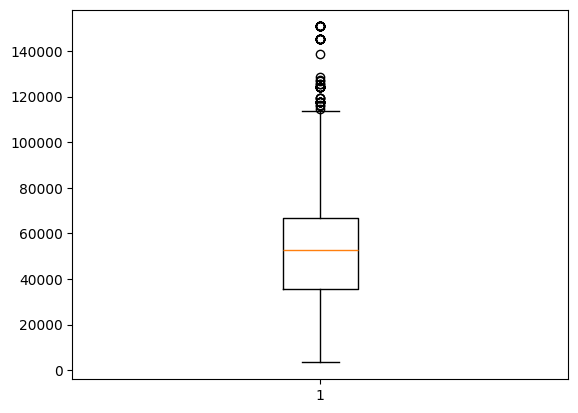

In [4]:
import matplotlib.pyplot as plt
plt.boxplot(Price['price/m2'])
plt.show()

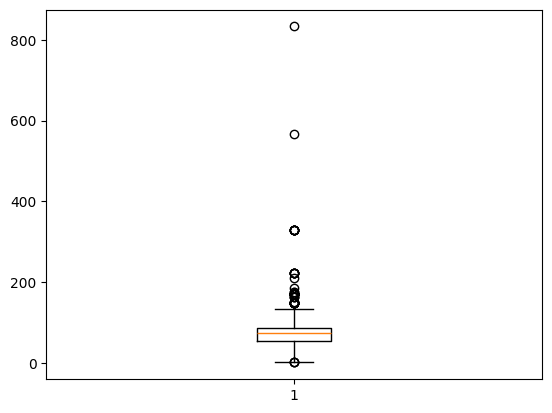

In [5]:
plt.boxplot(Rent['rent/m2'])
plt.show()

可以观察到，无论是房价还是租金，超过上四分位数的值有不少。但后续分析主要用到中位数，异常值影响不大。另外，特定房屋的售价或租赁价格虽然偏高，确实符合实际，可能是由于已有的变量无法捕捉到偏差。

### Get housing price per m2 and housing rent per m2 (price/m2 and rent/m2) for each block

In [8]:
PriceDaChang = Price[Price['location']  == '大厂']
PriceYanJiao = Price[Price['location'] == '燕郊']
PriceMaJuQiao = Price[Price['location'] == '马驹桥']
PriceYiZhuang = Price[Price['location'] == '亦庄']
RentDaChang = Rent[Rent['location']  == '大厂']
RentYanJiao = Rent[Rent['location'] == '燕郊']
RentMaJuQiao = Rent[Rent['location'] == '马驹桥']
RentYiZhuang = Rent[Rent['location'] == '亦庄']

### Median price to rent ratio for each block

In [9]:
# 计算房价租金比
RatioDaChang = PriceDaChang['price/m2'].median() / (RentDaChang['rent/m2'].median())
RatioYanJiao = PriceYanJiao['price/m2'].median() / (RentYanJiao['rent/m2'].median())
RatioMaJuQiao = PriceMaJuQiao['price/m2'].median() / (RentMaJuQiao['rent/m2'].median())
RatioYiZhuang = PriceYiZhuang['price/m2'].median() / (RentYiZhuang['rent/m2'].median())

print('大厂：',RatioDaChang)
print('燕郊 房价租金比：',RatioYanJiao)
print('马驹桥 房价租金比：',RatioMaJuQiao)
print('亦庄 房价租金比：',RatioYiZhuang)

大厂： nan
燕郊 房价租金比： 440.5885714285715
马驹桥 房价租金比： 620.3968337730871
亦庄 房价租金比： 739.0974705882353


大厂没有租房数据，无法计算房价租金比；燕郊、马驹桥和亦庄的房价租金比远大于200，可以认为在这三个地方租比买更好。

### Bar Plot the median price to rent ratio for each block

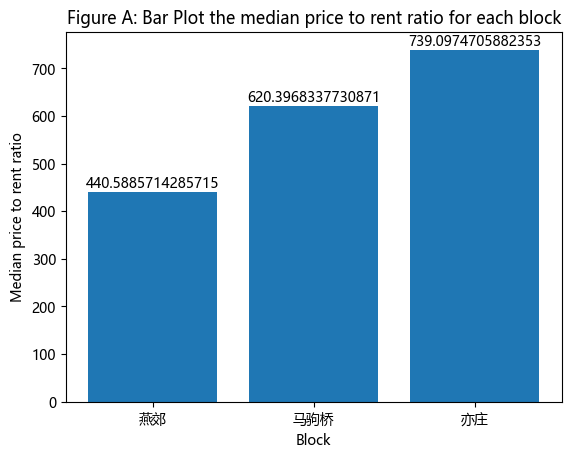

In [11]:
bars = plt.bar(['燕郊','马驹桥','亦庄'],[RatioYanJiao, RatioMaJuQiao, RatioYiZhuang])
# 显示具体数值
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height}', ha='center', va='bottom')
plt.rc("font",family='Microsoft YaHei')
plt.title('Figure A: Bar Plot the median price to rent ratio for each block')
plt.xlabel('Block')
plt.ylabel('Median price to rent ratio')
plt.show()

## 回归分析

### Model 1

In [11]:
import statsmodels.api as sm

X1 = Price.drop(columns = ['price(10k,yuan)','price/m2'])
X1 = pd.get_dummies(X1,columns = ['location'], drop_first = True)
X1['area(m2)*location_大厂'] = X1['area(m2)'] * X1['location_大厂']
X1['area(m2)*location_燕郊'] = X1['area(m2)'] * X1['location_燕郊']
X1['area(m2)*location_马驹桥'] = X1['area(m2)'] * X1['location_马驹桥']
X1 = sm.add_constant(X1)

y1 = Price['price/m2']
X1

,const,area(m2),location_大厂,location_燕郊,location_马驹桥,area(m2)*location_大厂,area(m2)*location_燕郊,area(m2)*location_马驹桥
0,1.0,88.63,True,False,False,88.63,0.0,0.0
1,1.0,130.70,True,False,False,130.70,0.0,0.0
2,1.0,130.70,True,False,False,130.70,0.0,0.0
3,1.0,119.00,True,False,False,119.00,0.0,0.0
4,1.0,89.00,True,False,False,89.00,0.0,0.0
...,...,...,...,...,...,...,...,...
7669,1.0,295.92,False,False,False,0.00,0.0,0.0
7670,1.0,205.25,False,False,False,0.00,0.0,0.0
7671,1.0,175.29,False,False,False,0.00,0.0,0.0
7672,1.0,80.00,False,False,False,0.00,0.0,0.0


In [12]:
model1 = sm.OLS(y1, X1.astype(float)).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               price/m2   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     1463.
Date:                Sun, 16 Mar 2025   Prob (F-statistic):               0.00
Time:                        18:13:30   Log-Likelihood:                -85169.
No. Observations:                7674   AIC:                         1.704e+05
Df Residuals:                    7666   BIC:                         1.704e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5.166e+04    475.864    108.561      0.000    5.07e+04    5.26e+04
area(m2)                 51.8706      2.601     19.942      0.000      46.772      56.969
location_大厂           -4.355e+04   6886.997     -6.324      0.000   -5.71e+04   -3.01e+04
location_燕郊           -4.962e+04   1016.175    -48.831      0.000   -5.16e+04   -4.76e+04
location_马驹桥          -2.273e+04   1768.892    -12.847      0.000   -2.62e+04   -1.93e+04
area(m2)*location_大厂    -61.4388     71.134     -0.864      0.388    -200.881      78.004
area(m2)*location_燕郊     45.7800      8.736      5.240      0.000      28.655      62.905
area(m2)*location_马驹桥   -19.3816     14.783     -1.311      0.190     -48.360       9.596
==============================================================================
Omnibus:                     1075.653   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3004.409
Skew:                           0.760   Prob(JB):                         0.00
Kurtosis:                       5.662   Cond. No.                     6.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

观察回归系数，在大厂和马驹桥，每平米房价与面积呈负相关；在燕郊和亦庄，每平米房价与面积呈正相关。

### Model 2

In [13]:
X2 = Rent.drop(columns = ['rent(yuan/month)', 'rent/m2'])
X2 = pd.get_dummies(X2,columns = ['location'], drop_first = True)
X2 = sm.add_constant(X2)
X2['area(m2)*location_燕郊'] = X2['area(m2)'] * X2['location_燕郊']
X2['area(m2)*location_马驹桥'] = X2['area(m2)'] * X2['location_马驹桥']

y2 = Rent['rent/m2']
X2

,const,area(m2),location_燕郊,location_马驹桥,area(m2)*location_燕郊,area(m2)*location_马驹桥
0,1.0,41,False,True,0,41
1,1.0,60,False,True,0,60
2,1.0,20,False,True,0,20
3,1.0,85,False,True,0,85
4,1.0,20,False,True,0,20
...,...,...,...,...,...,...
2942,1.0,50,False,False,0,0
2943,1.0,91,False,False,0,0
2944,1.0,72,False,False,0,0
2945,1.0,67,False,False,0,0


In [14]:
model2 = sm.OLS(y2,X2.astype(float)).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                rent/m2   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     391.8
Date:                Sun, 16 Mar 2025   Prob (F-statistic):          1.09e-322
Time:                        18:13:30   Log-Likelihood:                -14066.
No. Observations:                2947   AIC:                         2.814e+04
Df Residuals:                    2941   BIC:                         2.818e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    74.5648      1.101     67.696      0.000      72.405      76.725
area(m2)                  0.0534      0.007      8.061      0.000       0.040       0.066
location_燕郊             -49.5760      2.031    -24.414      0.000     -53.558     -45.594
location_马驹桥             -7.2837      6.321     -1.152      0.249     -19.678       5.110
area(m2)*location_燕郊     -0.0715      0.015     -4.806      0.000      -0.101      -0.042
area(m2)*location_马驹桥    -0.2215      0.062     -3.573      0.000      -0.343      -0.100
==============================================================================
Omnibus:                     4702.057   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5418565.335
Skew:                           9.880   Prob(JB):                         0.00
Kurtosis:                     212.136   Cond. No.                     1.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

观察回归系数，在马驹桥和燕郊，每平米月租金与面积呈负相关；在亦庄，每平米月租金与面积呈正相关。

### Prediction

#### Price prediction for m2 = 50 and m2 = 100

In [15]:
PricePrediction  = []
for m2 in [50,100]:
    for location in ['大厂', '燕郊', '马驹桥', '亦庄']:
        x = [1, m2, location == '大厂', location == '燕郊', location == '马驹桥',
              m2*(location == '大厂'), m2*(location == '燕郊'), m2*location == '马驹桥']
        y_predict =  model1.predict(x)
        row = [m2, location, y_predict[0]]
        PricePrediction.append(row)
PricePrediction = pd.DataFrame(PricePrediction)
PricePrediction.columns = ['area(m2)', 'location', 'PricePrediction']
PricePrediction

,area(m2),location,PricePrediction
0,50,大厂,7631.235165
1,50,燕郊,6922.411829
2,50,马驹桥,31528.125172
3,50,亦庄,54253.730467
4,100,大厂,7152.828039
5,100,燕郊,11804.945096
6,100,马驹桥,34121.656254
7,100,亦庄,56847.261549


#### Rent prediction for m2 = 50 and m2 = 100

In [16]:
RentPrediction  = []
for m2 in [50,100]:
    for location in ['燕郊', '马驹桥', '亦庄']:
        x = [1, m2, location == '燕郊', location == '马驹桥', m2*(location == '燕郊'), m2*location == '马驹桥']
        y_predict =  model2.predict(x)
        row = [m2, location, y_predict[0]]
        RentPrediction.append(row)
RentPrediction = pd.DataFrame(RentPrediction)
RentPrediction.columns = ['area(m2)', 'location', 'RentPrediction']
RentPrediction

,area(m2),location,RentPrediction
0,50,燕郊,24.081595
1,50,马驹桥,69.950109
2,50,亦庄,77.233835
3,100,燕郊,23.174356
4,100,马驹桥,72.619103
5,100,亦庄,79.902829


### Figure B and C: Bar Plot the price to rent ratio for each block for the m2 = 50, m2 = 100

#### Calculate the price to rent ratio

In [ ]:
PricePrediction1 = PricePrediction[~(PricePrediction['location'] == '大厂')]
PricePrediction1.reset_index(drop = True,inplace = True)
Ratio = []
i = 0
for m2 in [50,100]:
    for location in ['燕郊', '马驹桥', '亦庄']:
        ratio = PricePrediction1['PricePrediction'][i] / RentPrediction['RentPrediction'][i]
        row = [m2, location, ratio]
        Ratio.append(row)
        i += 1
Ratio = pd.DataFrame(Ratio)
Ratio.columns = ['area(m2)', 'location', 'Ratio']
Ratio

,area(m2),location,Ratio
0,50,燕郊,287.456539
1,50,马驹桥,450.723031
2,50,亦庄,702.460654
3,100,燕郊,509.396904
4,100,马驹桥,469.871631
5,100,亦庄,711.454929


#### Bar plot

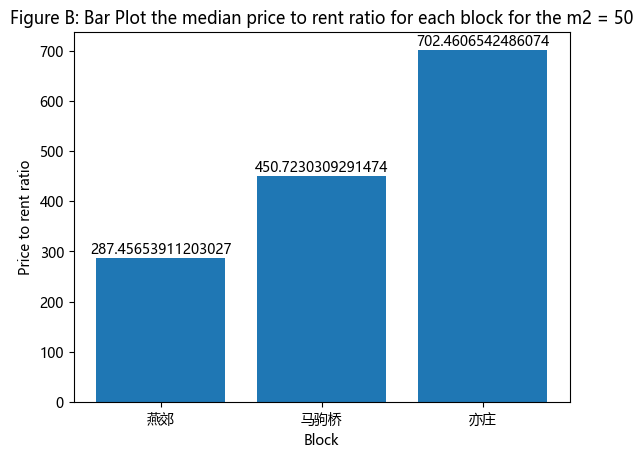

In [18]:
bars = plt.bar(Ratio[Ratio['area(m2)'] == 50]['location'],Ratio[Ratio['area(m2)'] == 50]['Ratio'])
# 显示具体数值
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height}', ha='center', va='bottom')
plt.rc("font",family='Microsoft YaHei')
plt.title('Figure B: Bar Plot the median price to rent ratio for each block for the m2 = 50')
plt.xlabel('Block')
plt.ylabel('Price to rent ratio')
plt.show()

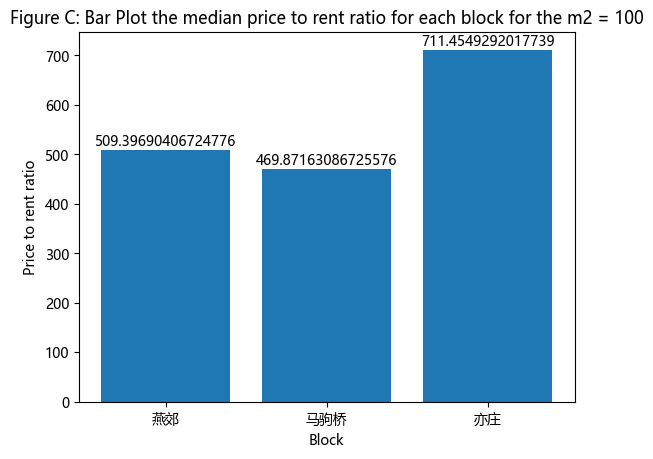

In [19]:
bars = plt.bar(Ratio[Ratio['area(m2)'] == 100]['location'],Ratio[Ratio['area(m2)'] == 100]['Ratio'])
# 显示具体数值
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height}', ha='center', va='bottom')
plt.rc("font",family='Microsoft YaHei')
plt.title('Figure C: Bar Plot the median price to rent ratio for each block for the m2 = 100')
plt.xlabel('Block')
plt.ylabel('Price to rent ratio')
plt.show()